<a href="https://colab.research.google.com/github/JpChii/ML-Projects/blob/main/Deep_Computer_Vision_Neural_Networks_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Convolutional Neural Networks

The intution behind CNN's are the neurons in biolgical vision's receptive field.

Each neurons percieve or react only to simple or complex things, this is then used by higher level neurons to detect the objecte. Only this higher level information to consciousness by the visual and audotory systems. This leads us to not asking questions how did i know this is this object.

Convoultion neural networks move over the image or rbg layer of pixel in 3 dimension to output a feature map. The kernel or filter size is used to generate feature maps using strides to pass through the image.

Each filter will react to different feature in an image and this doesn't need to be coded or configured manually and taken care by tf.

All the weights in a feature map are same reducing the complexity.

One major difference between CNN and Fully Connected Neural network is, CNN can identify an object in any context once it learns that but FCNN can only identify the object in the same context.

* Each convolutional layers multiple feature maps in three dimension.
* Each feature map has one neuron per feature map and all neurons in a feature map has the same weights and bias reducing the calculations.
* All neuron in same row and column across feature maps are connected to the outputs of the same exact neurons on the previous layer what this essentially does is different feature maps meaning different filters on the same output of previous layer or input layer learning differnt things from the image.

### TensorFlow Implementation

In tensorflow each image is represented as a 3D tensor of shape [*height*, *width*, *channels*]. A mini batch of images has *mini batch size* added to the shape resultng in a 4D Tensor. The wieghts are also represented as 4D tensor with [f_h, f_w, f_c,f_n], where f_n is the bias and is a Identity Matrix

Let's try a simple example loading two images using scikit-Learns load_sample_image() which creates two filtersand applies them to both images resulting in one of the feature maps.

In [ ]:
from sklearn.datasets import load_sample_image
import numpy as np
# Load sample image
china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255
images = np.array([china, flower])
batch_size, height, width, channels = images.shape

In [ ]:
print(f"""
batch size: {batch_size},
height: {height},
width: {width},
channels: {channels}
""")


batch size: 2,
height: 427,
width: 640,
channels: 3



In [ ]:
#Create 2 filters
filters = np.zeros(shape=(7,7,channels,2), dtype=np.float32)
print(f"""
Intial np zeros filter:
{filters}

""")
filters[:, 3, :, 0] = 1 # Vertical line
print(f"""
Filter1:
{filters[:, 3, :, 0]}

""")
filters[3, :, :, 1] = 1 # Horizontal line
print(f"""
Filter2:
{filters[:, 3, :, 0]}

""")
print(f"Is both filters same:{np.isclose(a=filters[:, 3, :, 0], b=filters[:, 3, :, 0])}")


Intial np zeros filter:
[[[[0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]]]


 [[[0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]]]


 [[[0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]]]


 [[[0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
  

In [ ]:
filters

array([[[[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[1., 0.],
         [1., 0.],
         [1., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[1., 0.],
         [1., 0.],
         [1., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 

In [ ]:
filters.shape

(7, 7, 3, 2)

In [ ]:
import tensorflow as tf
outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")

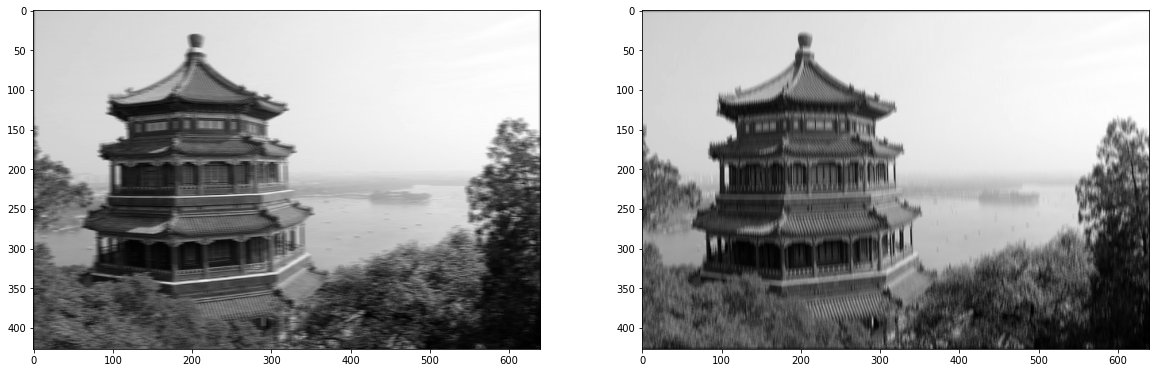

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,14))
plt.subplot(1, 2, 1)
plt.imshow(outputs[0,:,:,1], cmap="gray");
plt.subplot(1, 2, 2)
plt.imshow(outputs[0,:,:,0], cmap="gray");

In [ ]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

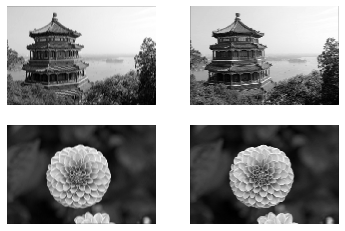

In [ ]:
for image_index in (0, 1):
    for feature_map_index in (0, 1):
        plt.subplot(2, 2, image_index * 2 + feature_map_index + 1)
        plot_image(outputs[image_index, :, :, feature_map_index])

plt.show()

In [ ]:
def crop(images):
    return images[150:220, 130:250]

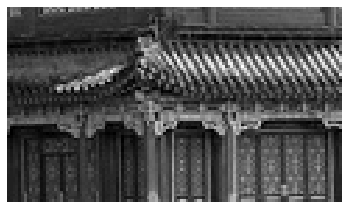

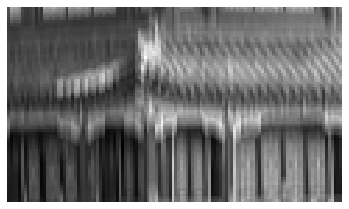

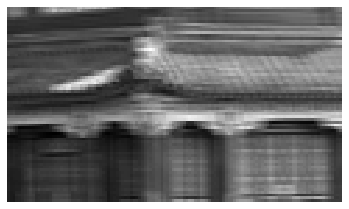

In [ ]:
plot_image(crop(images[0, :, :, 0]))
plt.show()

for feature_map_index, filename in enumerate(["china_vertical", "china_horizontal"]):
    plot_image(crop(outputs[0, :, :, feature_map_index]))
    plt.show()

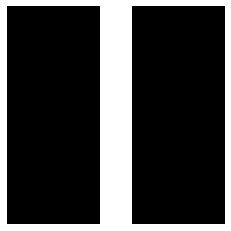

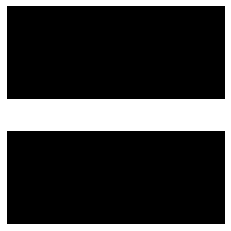

In [ ]:
plot_image(filters[:, :, 0, 0])
plt.show()
plot_image(filters[:, :, 0, 1])
plt.show()

In [ ]:
filters.shape

(7, 7, 3, 2)

The output size of convolution is set to number of input neurons divided by stride, rounded up. If the input size is 13 and stride is 5 output sizeis 2.6 rounded up to 3. The output size is same as input size when stride is equal to 1.

In this example we manually defined the filters, but in a realCNN we can normally define filters as trainable variablesso the neural net can learn which filters work best, as explained earlier. Instead of manually creating the variables, use the keras.layers.Conv2D layer:

In [ ]:
conv = tf.keras.layers.Conv2D(filters=32,
                       kernel_size=3,
                       strides=1,
                       padding="SAME",
                       activation="relu")

This code creates a Conv2D layer with 32 filters, each 3*3, using a stride of 1 (both horizontally and vertically), same padding and relu activation.